In [34]:
import numpy as np
from PIL import Image # Python Imaging Library - For operations like: Image open, resize image, etc..
from IPython.display import Image as show_image  # For displaying our test images to you
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions


In [35]:
# Let's load our image and rescale it to the resolution of 299x299 which InceptionResNetV2 requires..
img = Image.open("submarine.jpg").resize((299,299))


In [36]:
# We must convert it to array for operations...
img = np.array(img)

In [37]:
# Let's look it's shape.. (x,y,rgb)
img.shape

(299, 299, 3)

In [38]:
print(img.ndim)

3


In [39]:
# We have to add an extra dimension to our array so we will reshape it.. 
img = img.reshape(-1,299,299,3)   # with reshape(-1,..) I'm adding 1 extra dimension..
                                   # I do this because my model requires 4 dim array!

In [40]:
# Let's look it's shape..
img.shape


(1, 299, 299, 3)

In [41]:
print(img.ndim)

4


In [42]:
# I will scale input pixels between -1 and 1 using my model's preprocess_input
# InceptionResNetV2 model requires it..
img = preprocess_input(img)   

In [43]:
incresv2_model = InceptionResNetV2(weights='imagenet', classes=1000)   # InceptionResNetV2 will classify images into one of 
                                                                       # 1,000 possible categories.

In [44]:
# Now look at it's layers:
print(incresv2_model.summary())
print(type(incresv2_model))


Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_406 (Conv2D)            (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_406 (Batch  (None, 149, 149, 32  96         ['conv2d_406[0][0]']             
 Normalization)                 )                                               

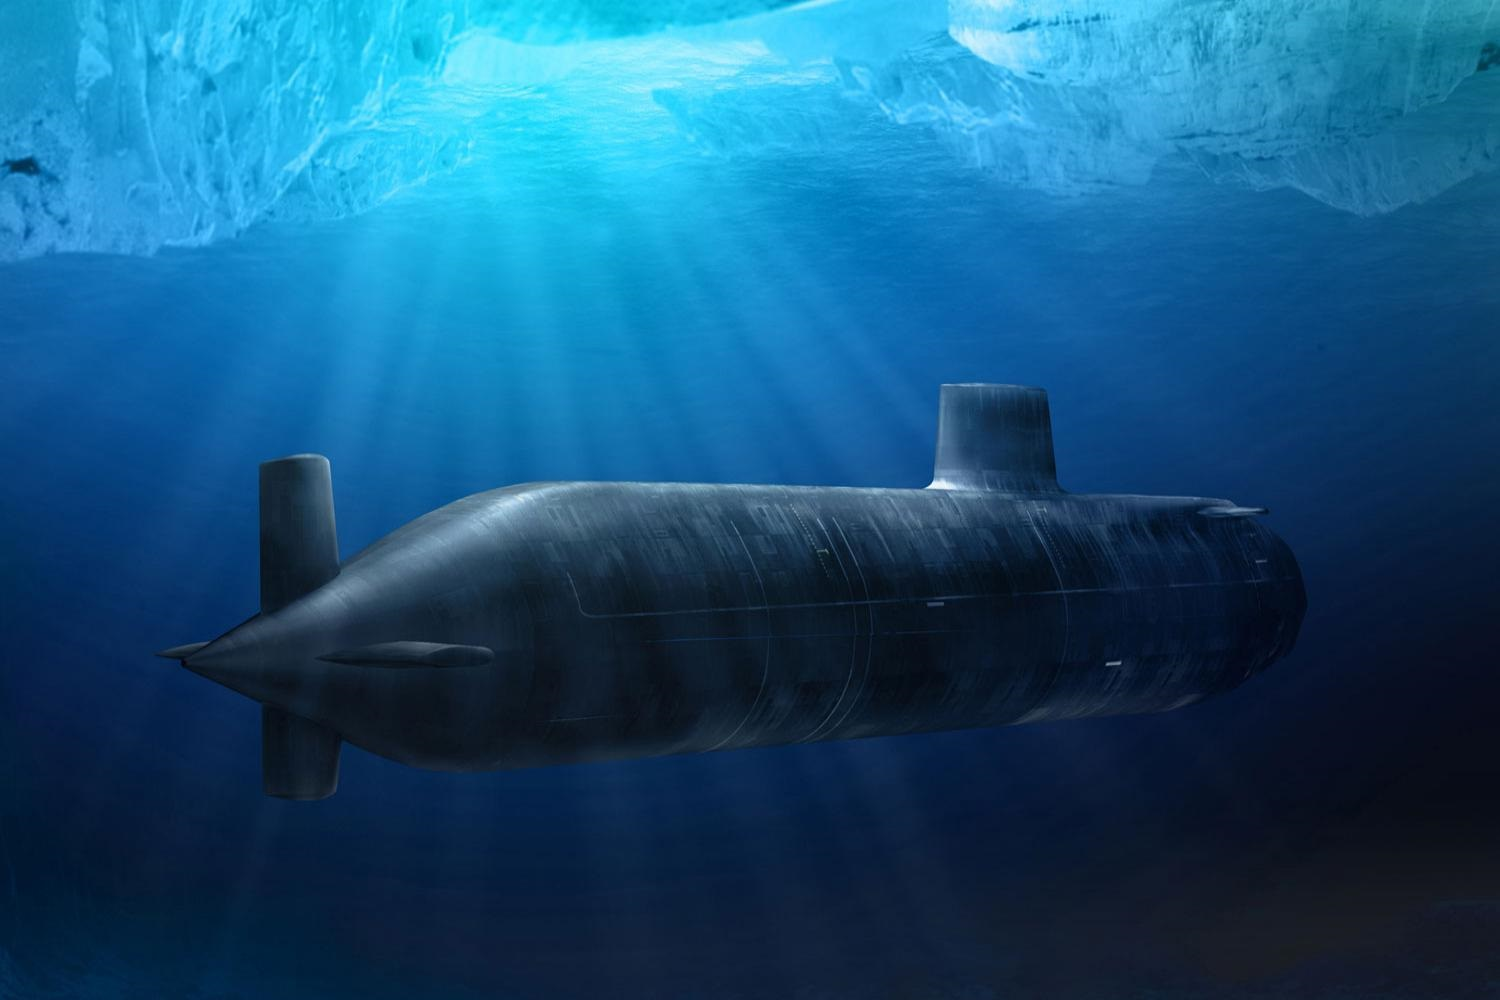

In [45]:
# Before prediction let's see our image with our eyes first:
show_image(filename='submarine.jpg') 

In [46]:
preds = incresv2_model.predict(img)
print('Predicted categories:', decode_predictions(preds, top=2)[0]) # decode the results into a list of tuples (top=2 -> en olası 2 tahmin yapacak)

Predicted categories: [('n04347754', 'submarine', 0.969117), ('n01484850', 'great_white_shark', 0.0024271377)]


In [57]:
import numpy as np

arr = np.arange(24)

print(arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [58]:
arr.shape

(24,)

In [59]:
#boyut
arr.ndim

1

In [60]:
arr = arr.reshape(-1,24) #We added an extra dimension to array a with reshape(-1,24)

In [61]:
arr.shape

(1, 24)

In [ ]:
arr

In [53]:
arr.ndim

2